minmax_for_dashboard: minmax가 적용된 env 데이터들을 모델에 넣어서 각 주의 예측값을 계산한다.<br/>
data_for_dashboard: 위에서 계산된 값을 data_for_dashboard의 새로운 column으로 저장한다. 단 새로운 데이터는 predicted_data_for_dashboard로 저장하였다.

In [46]:
import os
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.externals import joblib

warnings.filterwarnings(action='ignore');
from utils import getCode

In [91]:
rf_model = joblib.load('RF.pkl')
rf_only_env_model = joblib.load('RF_only_env.pkl')
svr_model = joblib.load('SVR.pkl')

In [4]:
#데이터 저장용
data_for_dashboard = pd.read_csv("./data/data_for_dashboard.csv", index_col=0)
data_for_dashboard.head()

,WS,EL,CI,TE,WD,HI,TL,IR,HL,TI,...,flowerTop,stemDiameter,leavesLength,leavesWidth,leavesNum,flowerPosition,fruitsPosition,fruitsNum,measDate,userId
0,1.198452,9.841488,632.278690,6.910179,42.461131,88.061131,18.460000,127.018452,95.621488,17.460179,...,21.5,10.18,39.2,28.6,17.0,11.7,1.7,5.0,2017-03-26 00:00:00,PF_0000227
1,1.409581,9.839581,625.905749,8.269042,42.085988,87.423533,17.159401,138.891078,96.254192,16.569521,...,1.9,5.25,39.2,28.4,15.0,27.7,21.3,64.0,2017-04-02 00:00:00,PF_0000227
2,1.726706,9.809921,615.776548,13.114960,39.648532,88.142480,17.982619,183.277321,94.930833,17.895655,...,10.5,6.66,42.0,28.0,20.0,2.8,8.0,93.0,2017-04-23 00:00:00,PF_0000227
3,1.703512,9.803036,606.192381,15.772024,38.516369,93.215387,19.006399,231.922946,95.204137,18.671637,...,9.0,8.80,41.0,24.0,18.0,2.4,8.0,87.0,2017-05-07 00:00:00,PF_0000227
4,1.482202,9.790119,596.609702,16.599405,39.730536,95.701190,18.536667,158.558869,95.001250,18.583631,...,11.0,2.98,29.0,22.0,18.0,0.6,7.0,103.0,2017-05-14 00:00:00,PF_0000227


In [16]:
#모델 돌리기용
minmax_for_dashboard = pd.read_csv("./data/minmax_for_dashboard.csv", index_col=0)
minmax_for_dashboard.head()
del minmax_for_dashboard['leavesLength']
del minmax_for_dashboard['fruitsNum']
del minmax_for_dashboard['fruitsPosition']
del minmax_for_dashboard['measDate']
del minmax_for_dashboard['userId']
del minmax_for_dashboard['index']
minmax_for_dashboard.head()

,WS,EL,CI,TE,WD,HI,TL,IR,HL,TI,RP,growLength,flowerTop,stemDiameter,leavesWidth,leavesNum,flowerPosition
0,0.204154,1.000000,0.734325,0.374888,0.029538,0.797479,0.372456,0.000000,0.957172,0.338198,0.000111,0.060818,0.383929,0.096952,0.484746,0.68,0.285366
1,0.252141,0.999806,0.726924,0.428803,0.029255,0.784608,0.361047,0.009087,0.963505,0.286140,0.000065,0.044974,0.033929,0.050000,0.481356,0.60,0.675610
2,0.324221,0.996792,0.715160,0.621074,0.027415,0.799122,0.368269,0.043059,0.950259,0.363652,0.000062,0.023850,0.187500,0.063429,0.474576,0.80,0.068293
3,0.318949,0.996093,0.704029,0.726498,0.026560,0.901527,0.377249,0.080292,0.952994,0.409008,0.000037,0.013629,0.160714,0.083810,0.406780,0.72,0.058537
4,0.268647,0.994780,0.692899,0.759326,0.027477,0.951707,0.373129,0.024140,0.950963,0.403864,0.000107,0.000170,0.196429,0.028381,0.372881,0.72,0.014634


In [6]:
fruitsNum_predict_result = rf_model.predict(minmax_for_dashboard)

In [7]:
leavesLength_predict_result = svr_model.predict(minmax_for_dashboard)

In [8]:
data_for_dashboard['fruitsNum_predict']=fruitsNum_predict_result
data_for_dashboard['leavesLength_predict']=leavesLength_predict_result

In [13]:
data_for_dashboard = data_for_dashboard.sort_values(by=['userId', 'measDate'], ignore_index=True)
data_for_dashboard

,WS,EL,CI,TE,WD,HI,TL,IR,HL,TI,...,leavesLength,leavesWidth,leavesNum,flowerPosition,fruitsPosition,fruitsNum,measDate,userId,fruitsNum_predict,leavesLength_predict
0,1.571127,2.090418,439.686405,10.117421,51.180388,80.080864,24.595348,281.813367,35.835403,18.361324,...,34.9,19.5,21.0,12.70,1.70,5.0,2017-03-19 00:00:00,PF_0000227,65.565231,31.720702
1,1.571127,2.090418,439.686405,10.117421,51.180388,80.080864,24.595348,281.813367,35.835403,18.361324,...,36.3,33.5,21.0,14.30,1.30,4.0,2017-03-19 00:00:00,PF_0000227,45.869146,42.664756
2,1.198452,9.841488,632.278690,6.910179,42.461131,88.061131,18.460000,127.018452,95.621488,17.460179,...,39.2,28.6,17.0,11.70,1.70,5.0,2017-03-26 00:00:00,PF_0000227,33.894874,39.300950
3,1.571127,2.090418,439.686405,10.117421,51.180388,80.080864,24.595348,281.813367,35.835403,18.361324,...,36.2,29.8,13.0,6.20,2.00,6.0,2017-03-26 00:00:00,PF_0000227,21.374973,35.158758
4,1.571127,2.090418,439.686405,10.117421,51.180388,80.080864,24.595348,281.813367,35.835403,18.361324,...,37.3,25.1,12.0,12.70,1.70,5.0,2017-03-26 00:00:00,PF_0000227,36.734097,33.716390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2.144721,2.576280,311.170402,17.327470,4.553363,81.901905,90.000000,281.813367,0.000000,20.059464,...,30.5,18.0,20.0,5.54,44.47,137.0,2020-05-18 00:00:00,PF_0010019,105.511518,29.479462
750,1.895152,2.558988,281.650060,19.551905,4.440893,82.860000,90.000000,281.813367,0.000000,21.024226,...,42.0,39.0,14.0,1.00,44.85,103.0,2020-05-25 00:00:00,PF_0010019,96.910543,41.901062
751,1.968652,2.554762,293.110833,19.393135,4.616190,83.119742,90.000000,281.813367,0.000000,20.745734,...,43.0,35.0,13.0,1.00,35.93,108.0,2020-05-25 00:00:00,PF_0010019,99.163374,42.524596
752,1.571127,2.090418,439.686405,10.117421,51.180388,80.080864,24.595348,281.813367,35.835403,18.361324,...,39.0,33.0,14.0,0.92,27.75,114.0,2020-05-25 00:00:00,PF_0010019,36.554278,35.680077


In [14]:
data_for_dashboard.to_csv('./data/predicted_data_for_dashboard.csv')

## 모델 확인

In [54]:
importances = list(rf_model.feature_importances_)[:-6]
importances_column = list(minmax_for_dashboard.columns)[:-6]

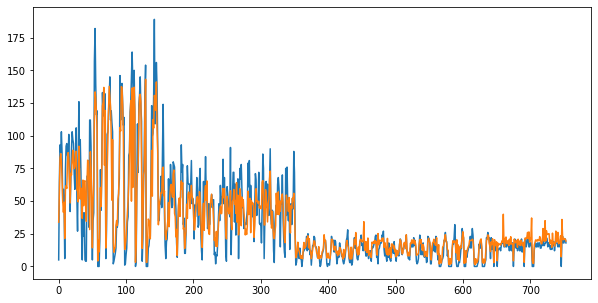

In [47]:
figure(figsize=(10,5))
plt.plot(data_for_dashboard[['fruitsNum', 'fruitsNum_predict']]);

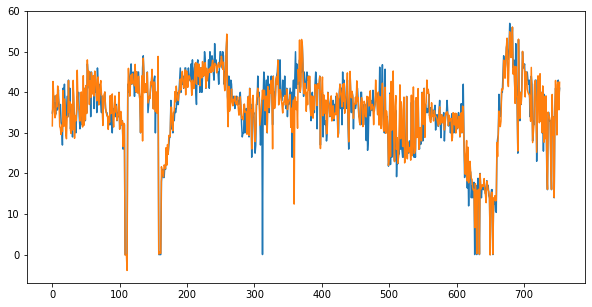

In [15]:
figure(figsize=(10,5))
plt.plot(data_for_dashboard[['leavesLength', 'leavesLength_predict']]);

## 찐찐막 데이터 준비
target이 되는 9개 농가에 대해 duplicate를 제거하고, measDate로 ordering하여 별도의 csv로 저장해둔다.

In [33]:
for user in list(set(data_for_dashboard['userId'])):
    df = pd.read_csv("./data/seasonenv/{}.csv".format(user), index_col=0)
    df = df.drop_duplicates().sort_values(by=['measDate'], ignore_index=True)
    df.to_csv('./data/kafka/env/{}.csv'.format(user))

In [43]:
for user in list(set(data_for_dashboard['userId'])):
    df = pd.read_csv("./data/seasonenv/{}.csv".format(user), index_col=0)
    print(df['facilityId'][0], list(df['measDate'])[0].split(' ')[0], list(df['measDate'])[-1].split(' ')[0])

PF_0000227_01 2017-01-01 2017-12-08
PF_0006042_01 2019-12-27 2020-05-16
PF_0001405_01 2017-01-01 2017-10-04
PF_0006024_01 2019-10-31 2020-05-12
PF_0006043_01 2019-10-31 2020-05-29
PF_0000304_01 2017-01-01 2017-08-07
PF_0006025_01 2019-11-05 2020-05-14
PF_0006023_01 2019-12-21 2020-06-13
PF_0010019_01 2019-11-22 2020-06-29


## 시간대별 센서의 평균값 계산

In [52]:
all_df = pd.DataFrame()
for user in list(set(data_for_dashboard['userId'])):
    df = pd.read_csv("./data/kafka/env/{}.csv".format(user), index_col=0)
    all_df=all_df.append(df, ignore_index=True)

In [64]:
env_mean=all_df[['fatrCode', 'measDate', 'senVal']].groupby(['fatrCode', 'measDate']).mean().sort_values(by=['measDate', 'fatrCode'])
env_mean

,,senVal
fatrCode,measDate,
CI,2017-01-01 00:00:00,508.206667
EL,2017-01-01 00:00:00,6.570000
HI,2017-01-01 00:00:00,83.503333
HL,2017-01-01 00:00:00,95.793333
IR,2017-01-01 00:00:00,0.000000
...,...,...
TE,2020-06-29 06:00:00,22.710000
TI,2020-06-29 06:00:00,23.300000
TL,2020-06-29 06:00:00,90.000000


In [67]:
env_mean.to_csv('./data/kafka/env_mean.csv')

In [71]:
env_mean=pd.read_csv('./data/kafka/env_mean.csv')
env_mean

,fatrCode,measDate,senVal
0,CI,2017-01-01 00:00:00,508.206667
1,EL,2017-01-01 00:00:00,6.570000
2,HI,2017-01-01 00:00:00,83.503333
3,HL,2017-01-01 00:00:00,95.793333
4,IR,2017-01-01 00:00:00,0.000000
...,...,...,...
190445,TE,2020-06-29 06:00:00,22.710000
190446,TI,2020-06-29 06:00:00,23.300000
190447,TL,2020-06-29 06:00:00,90.000000
190448,WD,2020-06-29 06:00:00,5.150000


## 데이터에 몇주차인지 달기

In [74]:
import datetime

In [2]:
data_for_dashboard = pd.read_csv('./data/predicted_data_for_dashboard.csv',  index_col=0)
env_hour=data_for_dashboard[data_for_dashboard['userId']=='PF_0010019']
env_hour=env_hour.drop_duplicates(subset=['userId', 'measDate'], keep='first')
env_hour.to_csv('./data/kafka/week/PF_0010019.csv')

In [5]:
env_week = pd.read_csv('./data/kafka/env/PF_0010019.csv', index_col=0)

In [28]:
def getWeeks(series):
    date = series.split(" ")[0].split('-')
    n=datetime.datetime(int(date[0]), int(date[1]), int(date[2]))
    return n.isocalendar()[0], n.isocalendar()[1]

In [29]:
env_hour['weeks']=env_hour['measDate'].agg(getWeeks)
env_week['weeks']=env_week['measDate'].agg(getWeeks)

In [30]:
env_hour

,WS,EL,CI,TE,WD,HI,TL,IR,HL,TI,...,leavesWidth,leavesNum,flowerPosition,fruitsPosition,fruitsNum,measDate,userId,fruitsNum_predict,leavesLength_predict,weeks
656,1.571127,2.090418,439.686405,10.117421,51.180388,80.080864,24.595348,281.813367,35.835403,18.361324,...,8.0,8.0,0.10,0.00,0.0,2019-12-09 00:00:00,PF_0010019,4.176787,13.479888,"(2019, 50)"
660,1.634026,2.844821,387.767679,6.911369,4.565833,84.924345,90.000000,281.813367,0.000000,17.325179,...,18.0,8.0,1.09,0.00,0.0,2019-12-16 00:00:00,PF_0010019,19.909787,27.576438,"(2019, 51)"
663,1.571127,2.090418,439.686405,10.117421,51.180388,80.080864,24.595348,281.813367,35.835403,18.361324,...,31.0,8.0,1.25,1.67,2.0,2019-12-23 00:00:00,PF_0010019,18.278526,35.373339,"(2019, 52)"
666,1.571127,2.090418,439.686405,10.117421,51.180388,80.080864,24.595348,281.813367,35.835403,18.361324,...,29.0,8.0,2.62,2.75,6.0,2019-12-30 00:00:00,PF_0010019,14.060494,32.911428,"(2020, 1)"
670,1.695635,2.632738,311.961756,3.909107,5.077411,82.262262,90.000000,281.813367,0.000000,17.040685,...,48.0,6.0,5.76,3.63,5.0,2020-01-06 00:00:00,PF_0010019,14.237324,47.930051,"(2020, 2)"
674,1.907919,2.788906,391.861146,5.634375,5.087760,89.088958,90.000000,281.813367,0.000000,16.633750,...,48.0,8.0,10.48,8.53,14.0,2020-01-14 00:00:00,PF_0010019,31.364730,51.101023,"(2020, 3)"
678,1.659566,2.742095,340.445155,4.534190,5.112083,84.942238,90.000000,281.813367,0.000000,16.903929,...,41.0,8.0,10.54,11.21,20.0,2020-01-20 00:00:00,PF_0010019,29.568962,47.933826,"(2020, 4)"
682,1.643750,2.800057,363.370819,4.227040,5.169052,87.060848,90.000000,281.813367,0.000000,16.971422,...,44.0,9.0,16.38,16.70,28.0,2020-01-28 00:00:00,PF_0010019,38.131268,51.434860,"(2020, 5)"
686,1.546353,2.855941,379.890448,4.924522,5.148086,88.370957,90.000000,281.813367,0.000000,17.012670,...,28.0,7.0,22.90,20.34,35.0,2020-02-03 00:00:00,PF_0010019,49.667475,44.099708,"(2020, 6)"
690,1.560659,2.862188,385.940750,4.166500,5.170854,87.950833,90.000000,281.813367,0.000000,17.420958,...,22.0,10.0,15.97,29.22,74.0,2020-02-10 00:00:00,PF_0010019,60.374099,38.636741,"(2020, 7)"


In [48]:
env_week

,fatrCode,facilityId,measDate,fldCode,sectCode,itemCode,senVal,ymd,cntCollect,num,totalRows,totalPage,currentPage,weeks
0,SO,PF_0010019_01,2019-11-22 00:00:00,FG,NT,80300,300.00,20191122,19,1,91494.0,92.0,1.0,"(2019, 47)"
1,HI,PF_0010019_01,2019-11-22 00:00:00,FG,EI,80300,93.18,20191122,19,18,NaN,NaN,NaN,"(2019, 47)"
2,EO,PF_0010019_01,2019-11-22 00:00:00,FG,NT,80300,0.00,20191122,19,17,NaN,NaN,NaN,"(2019, 47)"
3,PL,PF_0010019_01,2019-11-22 00:00:00,FG,EL,80300,6.05,20191122,19,16,NaN,NaN,NaN,"(2019, 47)"
4,WS,PF_0010019_01,2019-11-22 00:00:00,FG,EO,80300,1.23,20191122,19,15,NaN,NaN,NaN,"(2019, 47)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90995,HE,PF_0010019_01,2020-06-29 06:00:00,FG,EO,80300,80.35,20200629,20,90995,NaN,NaN,NaN,"(2020, 27)"
90996,TE,PF_0010019_01,2020-06-29 06:00:00,FG,EO,80300,22.71,20200629,20,90996,NaN,NaN,NaN,"(2020, 27)"
90997,WS,PF_0010019_01,2020-06-29 06:00:00,FG,EO,80300,0.92,20200629,14,90997,NaN,NaN,NaN,"(2020, 27)"
90998,TI,PF_0010019_01,2020-06-29 06:00:00,FG,EI,80300,23.30,20200629,20,90998,NaN,NaN,NaN,"(2020, 27)"


In [32]:
env_week.to_csv('./data/kafka/env/PF_0010019.csv')
env_hour.to_csv('./data/kafka/week/PF_0010019.csv')

## 데모를 위해 앞에 몇 주 빼기

In [89]:
env_week[env_week['weeks']==(2020,5)]

,fatrCode,facilityId,measDate,fldCode,sectCode,itemCode,senVal,ymd,cntCollect,num,totalRows,totalPage,currentPage,weeks
28512,TL,PF_0010019_01,2020-01-27 00:00:00,FG,NT,80300,90.00,20200127,20,28524,NaN,NaN,NaN,"(2020, 5)"
28513,TE,PF_0010019_01,2020-01-27 00:00:00,FG,EO,80300,8.17,20200127,20,28530,NaN,NaN,NaN,"(2020, 5)"
28514,EL,PF_0010019_01,2020-01-27 00:00:00,FG,EL,80300,2.79,20200127,20,28529,NaN,NaN,NaN,"(2020, 5)"
28515,EO,PF_0010019_01,2020-01-27 00:00:00,FG,NT,80300,0.00,20200127,20,28528,NaN,NaN,NaN,"(2020, 5)"
28516,HE,PF_0010019_01,2020-01-27 00:00:00,FG,EO,80300,74.20,20200127,20,28527,NaN,NaN,NaN,"(2020, 5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31099,WS,PF_0010019_01,2020-02-02 23:00:00,FG,EO,80300,1.39,20200202,20,31089,NaN,NaN,NaN,"(2020, 5)"
31100,TL,PF_0010019_01,2020-02-02 23:00:00,FG,NT,80300,90.00,20200202,20,31094,NaN,NaN,NaN,"(2020, 5)"
31101,SO,PF_0010019_01,2020-02-02 23:00:00,FG,NT,80300,300.00,20200202,20,31091,NaN,NaN,NaN,"(2020, 5)"
31102,TE,PF_0010019_01,2020-02-02 23:00:00,FG,EO,80300,-0.38,20200202,20,31092,NaN,NaN,NaN,"(2020, 5)"


In [90]:
env_week.iloc[28512:, :].to_csv('./data/kafka/env/PF_0010019_reduced.csv')

## 변수 중요도

In [50]:
env_hour.columns

Index(['WS', 'EL', 'CI', 'TE', 'WD', 'HI', 'TL', 'IR', 'HL', 'TI', 'RP',
       'index', 'growLength', 'flowerTop', 'stemDiameter', 'leavesLength',
       'leavesWidth', 'leavesNum', 'flowerPosition', 'fruitsPosition',
       'fruitsNum', 'measDate', 'userId', 'fruitsNum_predict',
       'leavesLength_predict', 'weeks'],
      dtype='object')

In [60]:
feature_importances=list(map(lambda x:round(100*x), list(rf_only_env_model.feature_importances_)))
feature_importances

[8.0, 11.0, 16.0, 7.0, 10.0, 6.0, 21.0, 1.0, 7.0, 10.0, 4.0]

In [62]:
values=[21.01, 16.0, 11.0, 10.0, 10.0, 8.0, 7.0, 7.0, 6.0,  3.0, 1.0]
labels=['TL', 'CI', 'EL', 'WD', 'TI', 'WS', 'TE', 'HL', 'HI',  'RP', 'IR']

In [88]:
pf = pd.read_csv(r'C:\Users\youjeongsue\Desktop\project\smartfarm-sw\smartfarm-dashboard\src\shared\data\predict_data_from_kafka.csv')
pf=pf.drop_duplicates(subset=['weeks'], keep='last')
pf.iloc[-1,1]=None
pf

,weeks,fruitsNum,fruitsNumPredict,onlyEnv
269,"(2020, 6)",35.0,61.564848,0
3222,"(2020, 7)",NaN,72.358995,0


## 간이 모델 정확도

In [95]:
#파일 저장후 다시 읽어와야 할 때
env_cultivate_mean_data_minmax = pd.read_csv('./data/data_for_dashboard.csv', index_col=0)
del env_cultivate_mean_data_minmax['index']
del env_cultivate_mean_data_minmax['measDate']
del env_cultivate_mean_data_minmax['userId']
columns=list(env_cultivate_mean_data_minmax.columns)
columns.remove('leavesLength')
columns.remove('fruitsNum')

In [96]:
from sklearn.model_selection import RepeatedKFold

def printScores(model, x, y):
    print("R^2: ",model.score(x, y))
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    mae = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    mae = np.absolute(mae)
    rmse = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    rmse = np.absolute(rmse)
    print('Mean MAE: %.3f (%.3f)' % (mean(mae), std(mae)))
    print('Mean RMSE: %.3f' % (mean(rmse)))

In [100]:
x

,WS,EL,CI,TE,WD,HI,TL,IR,HL,TI,RP,growLength,flowerTop,stemDiameter,leavesWidth,leavesNum,flowerPosition,fruitsPosition
0,1.198452,9.841488,632.278690,6.910179,42.461131,88.061131,18.460000,127.018452,95.621488,17.460179,0.133750,35.7,21.5,10.18,28.6,17.0,11.7,1.7
1,1.409581,9.839581,625.905749,8.269042,42.085988,87.423533,17.159401,138.891078,96.254192,16.569521,0.078922,26.4,1.9,5.25,28.4,15.0,27.7,21.3
2,1.726706,9.809921,615.776548,13.114960,39.648532,88.142480,17.982619,183.277321,94.930833,17.895655,0.074504,14.0,10.5,6.66,28.0,20.0,2.8,8.0
3,1.703512,9.803036,606.192381,15.772024,38.516369,93.215387,19.006399,231.922946,95.204137,18.671637,0.044673,8.0,9.0,8.80,24.0,18.0,2.4,8.0
4,1.482202,9.790119,596.609702,16.599405,39.730536,95.701190,18.536667,158.558869,95.001250,18.583631,0.128810,0.1,11.0,2.98,22.0,18.0,0.6,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2.874461,9.178024,379.765060,14.605659,162.007036,97.749192,0.000000,234.871916,98.042156,19.261287,4.603413,25.0,7.0,5.00,30.0,17.0,7.0,6.0
750,1.778302,9.190503,385.764088,11.647610,243.391321,97.646164,0.000000,265.213270,97.974151,19.785220,0.013648,13.0,9.0,6.50,31.0,18.0,7.0,6.0
751,2.253375,9.179750,380.000000,18.099688,165.191500,98.093500,0.000000,279.171437,97.911375,21.334500,0.076250,20.0,7.0,4.50,32.0,18.0,8.3,7.0
752,2.412126,9.166257,379.378683,17.873743,172.880090,97.841048,0.000000,331.280719,97.661946,20.560359,14.472455,24.0,7.0,3.60,24.0,16.0,8.0,7.0


In [101]:
from sklearn.model_selection import train_test_split

x=env_cultivate_mean_data_minmax[['WS', 'EL','CI','TE','WD','HI','TL','IR','HL','TI','RP']]
y_leaves=env_cultivate_mean_data_minmax['leavesLength']
y_fruits=env_cultivate_mean_data_minmax['fruitsNum']

In [102]:
rf_only_env_model.score(x, y_fruits) #왜 더 높냐

0.745692507532123